In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
df = pd.read_csv("../data/df_match_ts_match_lg_11000.csv")

In [26]:
df.head()

,ts_1,ts_2,type,match_score,d_m,d_mean,d_std,d_count,d_q25,d_q50,d_q75
0,M7427,M42363,fft,11100,45.991811,2221.759745,843.649757,3616.507246,1529.8320,1807.099615,3132.698092
1,M7427,M42375,fft,11100,30.937486,1093.036188,450.032771,3616.507246,675.6300,632.260000,1762.730000
2,M7427,M42483,fft,11100,26.464491,2050.337928,1202.327927,3616.507246,1447.8653,2255.766500,2665.996000
3,M7427,M42999,fft,11111,44.970596,1261.678675,1001.585377,3615.507246,508.0000,875.000000,2224.000000
4,M7427,M44016,fft,11100,17.367921,1360.231884,738.308292,3616.507246,1895.0000,1589.000000,2040.000000


In [3]:
df.memory_usage().sum()/1024**3

3.084389388561249

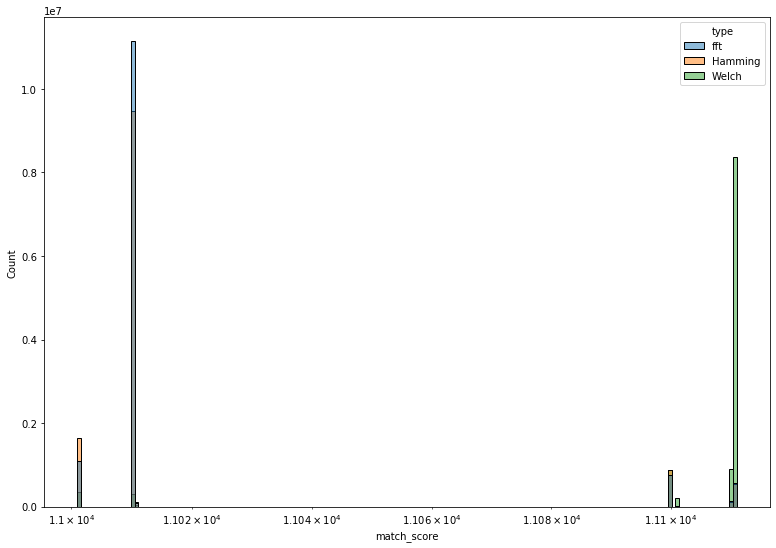

In [4]:
fig, ax = plt.subplots(figsize=(13,9))

sb.histplot(df, x='match_score', hue='type', log_scale=True)

In [35]:
ts_name = df['ts_1'].sample(1).values[0]
window_type = 'Hamming'

In [36]:
ts_name

'M5907'

In [37]:
ms_max_fft = df[(df['ts_1']==ts_name) & (df['type']==window_type)]['match_score'].max()
df[(df['ts_1']==ts_name) & (df['type']==window_type)\
  & (df['match_score']==ms_max_fft)].sort_values('d_m').head()

,ts_1,ts_2,type,match_score,d_m,d_mean,d_std,d_count,d_q25,d_q50,d_q75
35654392,M5907,M26437,Hamming,11111,2.345595,596.742338,568.394152,1230.92,1116.45,1264.00,394.30
35658627,M5907,M43320,Hamming,11111,2.793601,482.170923,610.398913,1227.92,31.95,210.00,1155.20
35658631,M5907,M43327,Hamming,11111,3.664715,1609.729446,530.779772,1227.92,1496.95,1625.00,1434.80
35659981,M5907,M5895,Hamming,11111,11.840053,5557.005926,4744.262980,1229.92,2521.95,4270.00,6369.80
35659988,M5907,M5921,Hamming,11111,20.555713,4501.077037,3456.298673,1229.92,1640.45,3239.15,7088.35


In [38]:
df_sub = df[(df['ts_1']==ts_name) & (df['type']==window_type)\
  & (df['match_score']==ms_max_fft)]

In [39]:
m_min_fft = df_sub['d_m'].min()
mean_min_fft = df_sub['d_mean'].min()
std_min_fft = df_sub['d_std'].min()
q25_min_fft = df_sub['d_q25'].min()
q50_min_fft = df_sub['d_q50'].min()
q75_min_fft = df_sub['d_q75'].min()

ts_m_name = df_sub[df_sub['d_m']==m_min_fft].iloc[0,1]
ts_mean_name = df_sub[df_sub['d_mean']==mean_min_fft].iloc[0,1]
ts_std_name = df_sub[df_sub['d_std']==std_min_fft].iloc[0,1]
ts_q25_name = df_sub[df_sub['d_q25']==q25_min_fft].iloc[0,1]
ts_q50_name = df_sub[df_sub['d_q50']==q50_min_fft].iloc[0,1]
# ts_q50_name = 'M20141' # chosen because q50 is 0.0 for multiple values (rest of metrics are better)
ts_q75_name = df_sub[df_sub['d_q75']==q75_min_fft].iloc[0,1]

In [40]:
ar_orig = np.array(df_all[df_all['V1']==ts_name].iloc[:,1:].dropna(axis=1))[0]
ar_m =  np.array(df_all[df_all['V1']==ts_m_name].iloc[:,1:].dropna(axis=1))[0]
ar_mean =  np.array(df_all[df_all['V1']==ts_mean_name].iloc[:,1:].dropna(axis=1))[0]
ar_std =  np.array(df_all[df_all['V1']==ts_std_name].iloc[:,1:].dropna(axis=1))[0]
ar_q25 =  np.array(df_all[df_all['V1']==ts_q25_name].iloc[:,1:].dropna(axis=1))[0]
ar_q50 =  np.array(df_all[df_all['V1']==ts_q50_name].iloc[:,1:].dropna(axis=1))[0]
ar_q75 =  np.array(df_all[df_all['V1']==ts_q75_name].iloc[:,1:].dropna(axis=1))[0]


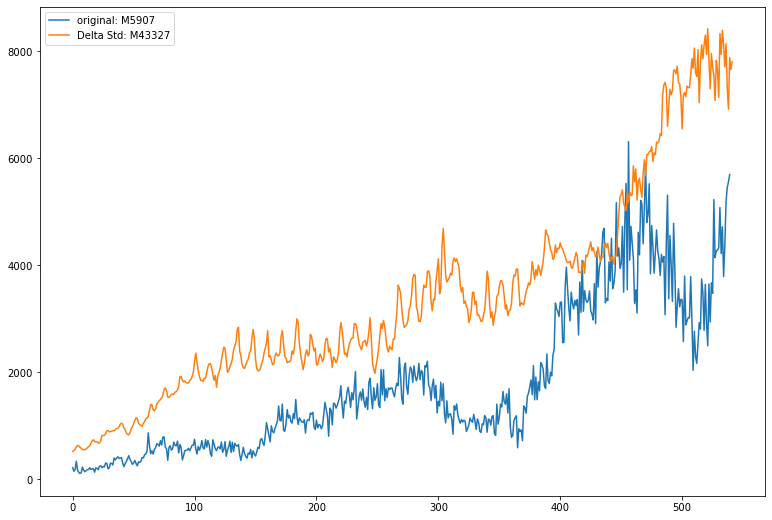

In [42]:
fig, ax = plt.subplots(figsize=(13,9))
ax = plt.plot(ar_orig, label="original: "+ts_name)
# ax = plt.plot(ar_m, label="Delta M: "+ts_m_name)
# ax = plt.plot(ar_mean, label="Delta Mean: "+ ts_mean_name)
ax = plt.plot(ar_std, label="Delta Std: "+ts_std_name)
# ax = plt.plot(ar_q25, label="Delta q25: "+ts_q25_name)
# ax = plt.plot(ar_q50, label="Delta q50: "+ts_q50_name)
# ax = plt.plot(ar_q75, label="Delta q75: "+ts_q75_name)

plt.legend()

## Remember for later
original: Q8362

### Read M4 TS data

In [11]:
df_hourly = pd.read_csv("../m4_data/hourly-train.csv")
df_daily = pd.read_csv("../m4_data/Daily-train.csv")
df_monthly = pd.read_csv("../m4_data/Monthly-train.csv")
df_quarterly = pd.read_csv("../m4_data/Quarterly-train.csv")
df_weekly = pd.read_csv("../m4_data/Weekly-train.csv")
df_yearly = pd.read_csv("../m4_data/Yearly-train.csv")
print(f"daily shape: {df_daily.shape}")
print(f"monthly shape: {df_monthly.shape}")
print(f"quarterly shape: {df_quarterly.shape}")
print(f"weekly shape: {df_weekly.shape}")
print(f"yearly shape: {df_yearly.shape}")

daily shape: (4227, 9920)
monthly shape: (48000, 2795)
quarterly shape: (24000, 867)
weekly shape: (359, 2598)
yearly shape: (23000, 836)


In [12]:
df[(df['ts_1']=='D4214')]['type'].unique()

array([], dtype=object)

In [13]:
ms_max = df[(df['ts_1']=='D4214') & (df['type']=='Hamming')]['match_score'].max()
ms_max_fft = df[(df['ts_1']=='D4214') & (df['type']=='fft')]['match_score'].max()
ms_max_wel = df[(df['ts_1']=='D4214') & (df['type']=='Welch')]['match_score'].max()

In [14]:
df[(df['type']=='fft')].head()

,ts_1,ts_2,type,match_score,d_m,d_mean,d_std,d_count,d_q25,d_q50,d_q75
0,M7427,M42363,fft,11100,45.991811,2221.759745,843.649757,3616.507246,1529.8320,1807.099615,3132.698092
1,M7427,M42375,fft,11100,30.937486,1093.036188,450.032771,3616.507246,675.6300,632.260000,1762.730000
2,M7427,M42483,fft,11100,26.464491,2050.337928,1202.327927,3616.507246,1447.8653,2255.766500,2665.996000
3,M7427,M42999,fft,11111,44.970596,1261.678675,1001.585377,3615.507246,508.0000,875.000000,2224.000000
4,M7427,M44016,fft,11100,17.367921,1360.231884,738.308292,3616.507246,1895.0000,1589.000000,2040.000000


In [15]:
df_all = pd.concat([df_hourly, df_daily, df_monthly, df_quarterly, df_weekly, df_yearly])

In [16]:
df_hourly = None
df_daily = None
df_weekly = None
df_monthly = None
df_quarterly = None
df_yearly = None

In [17]:
ar1 = np.array(df_all[df_all['V1']=='D4214'].iloc[:,1:].dropna(axis=1))[0]
ar2 =  np.array(df_all[df_all['V1']=='W57'].iloc[:,1:].dropna(axis=1))[0]

# tests
ar3 =  np.array(df_all[df_all['V1']=='D1779'].iloc[:,1:].dropna(axis=1))[0]
ar4 =  np.array(df_all[df_all['V1']=='M26526'].iloc[:,1:].dropna(axis=1))[0]
ar4 =  np.array(df_all[df_all['V1']=='M26526'].iloc[:,1:].dropna(axis=1))[0]
ar5 =  np.array(df_all[df_all['V1']=='M41543'].iloc[:,1:].dropna(axis=1))[0]


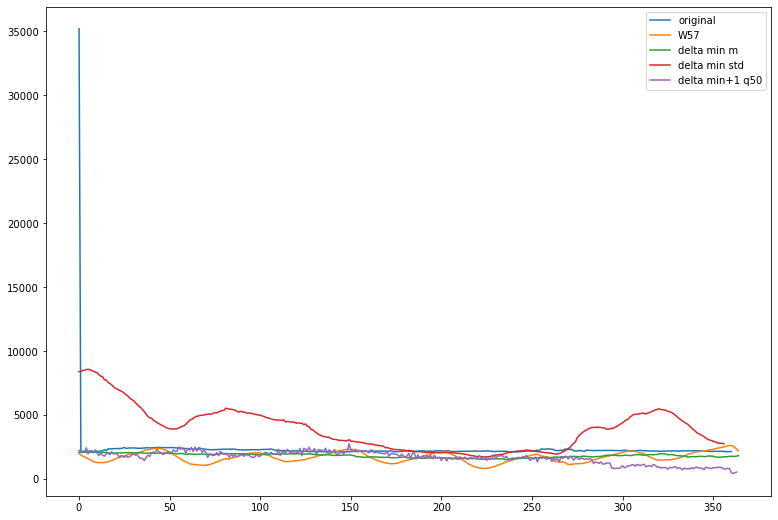

In [18]:
fig, ax = plt.subplots(figsize=(13,9))
ax = plt.plot(ar1, label="original")
ax = plt.plot(ar2, label="W57")
ax = plt.plot(ar3, label="delta min m")
ax = plt.plot(ar4, label="delta min std")
ax = plt.plot(ar5, label="delta min+1 q50")
plt.legend()

### Data Validation

In [ ]:
df_stats = pd.read_csv("../data/df_stats.csv")

In [ ]:
df_stats.head()

In [ ]:
df_stats['g'] = df_stats['ts_name'].astype(str).str[0]

In [ ]:
sampl = df_stats.groupby('g')['ts_name'].sample(1).to_list()

In [ ]:
df_stats[df_stats['ts_name'].isin(sampl)]